In [4]:
import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 워닝 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 불러올 csv excel json 파일을 현재 주피터 파일 위치에 넣어둘 경우 , 파일명만 입력해도 불러올 수 있다.

data = pd.read_excel('(삼성카드)가맹점 기반 지역별 소비행태.xlsx' 
             , usecols = "A,C,E,F" , names = ['Date' , 'Si' , 'Shop' , 'cnt'])
gender_age = pd.read_excel('(삼성카드)가맹점 기반 지역별 소비행태.xlsx' 
             , usecols = "G:P")
day_of_weekend = pd.read_excel('(삼성카드)가맹점 기반 지역별 소비행태.xlsx' 
             , usecols = "Q:Y")

In [5]:
data['Si'].str.split(' ' , expand = True)[2]

0       중앙동2가
1         경장동
2         영운리
3         조촌동
4         조촌동
        ...  
7685      산정동
7686      도암리
7687      정량동
7688      화삼리
7689      안정리
Name: 2, Length: 7690, dtype: object

In [6]:
data.query('Si.str.contains("목포시")').index.to_list()

[0,
 8,
 11,
 14,
 15,
 21,
 22,
 25,
 29,
 33,
 34,
 38,
 43,
 44,
 47,
 50,
 51,
 53,
 56,
 61,
 62,
 68,
 69,
 70,
 72,
 73,
 77,
 78,
 79,
 94,
 97,
 106,
 112,
 117,
 119,
 121,
 134,
 137,
 140,
 146,
 147,
 151,
 152,
 155,
 162,
 163,
 167,
 175,
 177,
 183,
 195,
 204,
 205,
 206,
 209,
 211,
 213,
 215,
 218,
 222,
 223,
 225,
 229,
 232,
 233,
 236,
 243,
 247,
 258,
 262,
 267,
 268,
 269,
 272,
 282,
 285,
 290,
 295,
 297,
 298,
 299,
 311,
 316,
 321,
 325,
 328,
 336,
 337,
 339,
 341,
 360,
 362,
 369,
 377,
 380,
 383,
 386,
 389,
 390,
 399,
 401,
 402,
 417,
 420,
 423,
 427,
 429,
 440,
 442,
 446,
 447,
 452,
 454,
 456,
 457,
 460,
 461,
 463,
 464,
 466,
 467,
 473,
 474,
 478,
 479,
 482,
 484,
 486,
 488,
 491,
 492,
 496,
 503,
 508,
 517,
 522,
 526,
 528,
 529,
 531,
 534,
 541,
 543,
 553,
 556,
 557,
 559,
 563,
 570,
 571,
 582,
 590,
 594,
 595,
 604,
 605,
 607,
 608,
 611,
 615,
 617,
 619,
 627,
 629,
 635,
 637,
 638,
 640,
 643,
 646,
 649,
 650,
 

In [7]:
# area = 목포시 , 통영시 , 군산시
# name = mokpo , tongyeong , gunsan
# globals() - 전역변수 선언 [변수 이름 선언 - format을 사용하여 입력값을 변수 이름으로 선언]

def slicing (area : str , name : str) :
    # data를 카피하여 전역변수에 저장
    globals()[f'{name}_data'] = data.copy()
    
    # df 생성 알림
    print(f'{name}_data 가 생성되었습니다.')
    
    # 칼럼 을 2번 자리에 넣기위해 insert 칼럼 추가 함수 사용
    # 추가할 칼럼은 Dong이 담긴 데이터 . Dong 데이터는 split으로 분할하여 구한다.
    globals()[f'{name}_data'].insert(2 , 'Dong' , globals()[f'{name}_data']['Si'].str.split(' ' , expand = True)[2])
    
    # index 슬라이싱을 위해 시별로 분리한 데이터의 index를 구하여 리스트로 변환
    globals()[f'{name}_indx'] = globals()[f'{name}_data'].query('Si.str.contains(@area)').index.to_list()
    # Si에는 area 즉 목포시 군산시 통영시 중 입력한 하나의 값이 들어간다.
    globals()[f'{name}_data']['Si'] = area
    
    # 이후 기본 data가 담긴 전역변수는 인덱스 리셋
    globals()[f'{name}_data'] = globals()[f'{name}_data'].loc[globals()[f'{name}_indx']].reset_index(drop = True)
    # 슬라이싱된 성 연령별 데이터 새로운 전역변수에 저장
    globals()[f'{name}_gender_age']     = gender_age.loc[globals()[f'{name}_indx']].reset_index(drop = True)
    # 슬라이싱된 요일 휴일 평일 데이터 새로운 전역변수에 저장
    globals()[f'{name}_day_of_weekend'] = day_of_weekend.loc[globals()[f'{name}_indx']].reset_index(drop = True)
    
    # 위의 저장된 기본 data와 성 연령별 데이터를 concat으로 결합 이후 새로운 전역변수에 저장
    globals()[f'{name}_gender_age_frm'] = pd.concat([globals()[f'{name}_data'] , globals()[f'{name}_gender_age']] , axis = 1)
    # 위의 저장된 기본 data와 요일 휴일 평일 데이터를 concat으로 결합 이후 새로운 전역변수에 저장
    globals()[f'{name}_day_of_weekend_frm'] = pd.concat([globals()[f'{name}_data'] , globals()[f'{name}_day_of_weekend']] , axis = 1)
    
    # df 생성 알림
    print(f'{name}_gender_age_frm 가 생성되었습니다.')
    print(f'{name}_day_of_weekend_frm 가 생성되었습니다.')
    

In [8]:
slicing('목포시' , 'mokpo')
print()
slicing('통영시' , 'tongyeong')
print()
slicing('군산시' , 'gunsan')

mokpo_data 가 생성되었습니다.
mokpo_gender_age_frm 가 생성되었습니다.
mokpo_day_of_weekend_frm 가 생성되었습니다.

tongyeong_data 가 생성되었습니다.
tongyeong_gender_age_frm 가 생성되었습니다.
tongyeong_day_of_weekend_frm 가 생성되었습니다.

gunsan_data 가 생성되었습니다.
gunsan_gender_age_frm 가 생성되었습니다.
gunsan_day_of_weekend_frm 가 생성되었습니다.


In [107]:
# cnt

display(tongyeong_data)
display(mokpo_data)
display(gunsan_data)
pd.set_option('display.max_rows', 10)



,Date,Si,Dong,Shop,cnt
0,202003,통영시,영운리,음식점,83
1,202001,통영시,삼화리,마트/할인점,118
2,202003,통영시,덕포리,골프장,49
3,202002,통영시,죽림리,편의점,4616
4,202002,통영시,정량동,인테리어,193
...,...,...,...,...,...
2043,202101,통영시,안정리,학원,13
2044,202103,통영시,도남동,건강보조,130
2045,202002,통영시,정량동,차량관리,37
2046,202001,통영시,화삼리,음식점,60


,Date,Si,Dong,Shop,cnt
0,202003,목포시,중앙동2가,음식점,79
1,202002,목포시,상동,음식점,15003
2,202002,목포시,산정동,문구사무용품,107
3,202001,목포시,상동,보험,19
4,202102,목포시,대안동,병원,106
...,...,...,...,...,...
2086,202103,목포시,석현동,학원,28
2087,202001,목포시,상락동2가,건강보조,128
2088,202101,목포시,용해동,인테리어,89
2089,202002,목포시,대양동,인테리어,48


,Date,Si,Dong,Shop,cnt
0,202001,군산시,경장동,취미,70
1,202003,군산시,조촌동,아울렛,3643
2,202101,군산시,조촌동,서적,17
3,202101,군산시,문화동,마트/할인점,389
4,202101,군산시,경암동,차량관리,42
...,...,...,...,...,...
3546,202003,군산시,나운동,관람,49
3547,202101,군산시,미룡동,문구사무용품,45
3548,202102,군산시,문화동,의류,11
3549,202101,군산시,지경리,음식점,157


# 20-21년도 업종별 데이터 시각화
- 날짜 데이터 문자열로 변경
- 20년도 데이터와 21년도 데이터 분리(mokpo_20, mokpo_21)
- 업종별 그룹 프레임(mokpo_shop)

In [108]:
mokpo_data['Date'] = mokpo_data['Date'].astype(str)
mokpo_20 = mokpo_data[mokpo_data['Date'].str[:4] == '2020']
mokpo_21 = mokpo_data[mokpo_data['Date'].str[:4] == '2021']
mokpo_shop = mokpo_20.groupby('Shop').agg(sum)
mokpo_shop.rename(columns = {'cnt':'20'}, inplace = True)
mokpo_shop['21'] = mokpo_21.groupby('Shop').agg(sum)
mokpo_shop

,20,21
Shop,,
가례,35,83.0
가전,3394,3465.0
건강보조,33635,27559.0
골프장,792,1245.0
공과금,131,75.0
...,...,...
커피/음료,27299,29236.0
패션잡화,2128,1990.0
편의점,66161,75355.0


#### 막대그래프로 시각화

<Figure size 432x288 with 0 Axes>

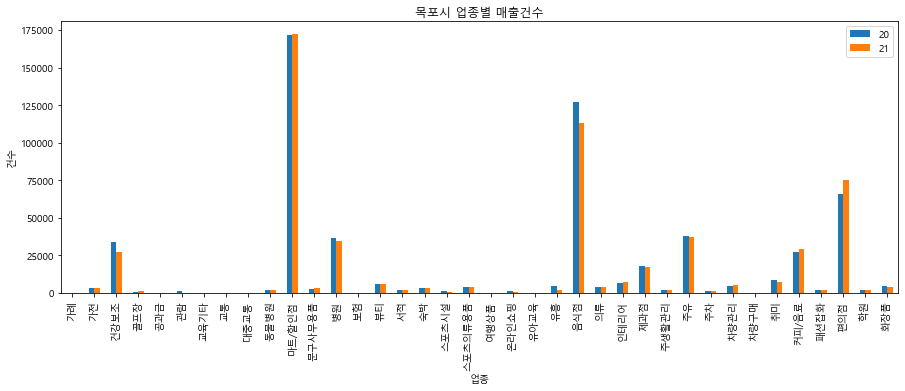

In [13]:
plt.figure()
mokpo_shop.plot(kind = 'bar',
               figsize = (15,5))
plt.title('목포시 업종별 매출건수')
plt.xlabel('업종')
plt.ylabel('건수')
plt.legend(loc = 'best')

plt.show()
plt.close()

#### 같은 방식으로 통영 데이터 시각화

In [110]:
tongyeong_data['Date'] = tongyeong_data['Date'].astype(str)
tongyeong_20 = tongyeong_data[tongyeong_data['Date'].str[:4] == '2020']
tongyeong_21 = tongyeong_data[tongyeong_data['Date'].str[:4] == '2021']
tongyeong_shop = tongyeong_20.groupby('Shop').agg(sum)
tongyeong_shop.rename(columns = {'cnt':'20'}, inplace = True)
tongyeong_shop['21'] = tongyeong_21.groupby('Shop').agg(sum)
tongyeong_shop

,20,21
Shop,,
가례,62,47
가전,1566,1762
건강보조,15066,12780
골프장,377,464
공과금,23,59
...,...,...
커피/음료,11636,14105
패션잡화,7472,7514
편의점,54724,58253


<Figure size 432x288 with 0 Axes>

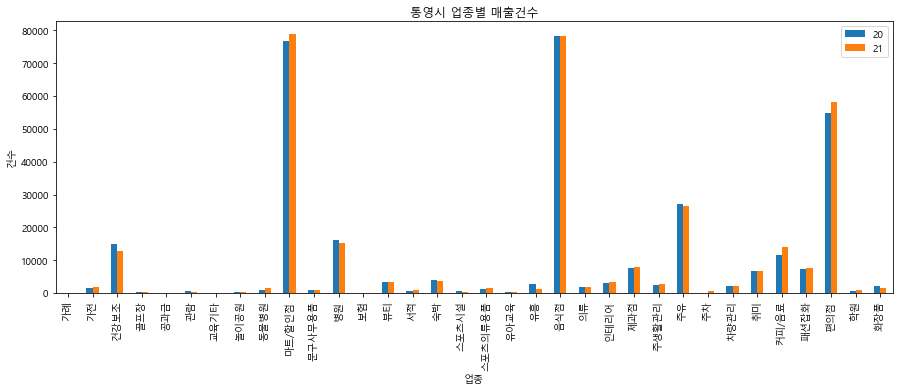

In [15]:
plt.figure()
tongyeong_shop.plot(kind = 'bar',
               figsize = (15,5))
plt.title('통영시 업종별 매출건수')
plt.xlabel('업종')
plt.ylabel('건수')
plt.legend(loc = 'best')

plt.show()
plt.close()

#### 같은 방식으로 군산 데이터 시각화

In [111]:
gunsan_data['Date'] = gunsan_data['Date'].astype(str)
gunsan_20 = gunsan_data[gunsan_data['Date'].str[:4] == '2020']
gunsan_21 = gunsan_data[gunsan_data['Date'].str[:4] == '2021']
gunsan_shop = gunsan_20.groupby('Shop').agg(sum)
gunsan_shop.rename(columns = {'cnt':'20'}, inplace = True)
gunsan_shop['21'] = gunsan_21.groupby('Shop').agg(sum)
gunsan_shop

,20,21
Shop,,
가전,3602,6029
건강보조,31787,24534
골프장,1674,2006
공과금,938,531
관람,1710,434
...,...,...
패션잡화,3065,4847
편의점,83898,87263
학교,62,61


<Figure size 432x288 with 0 Axes>

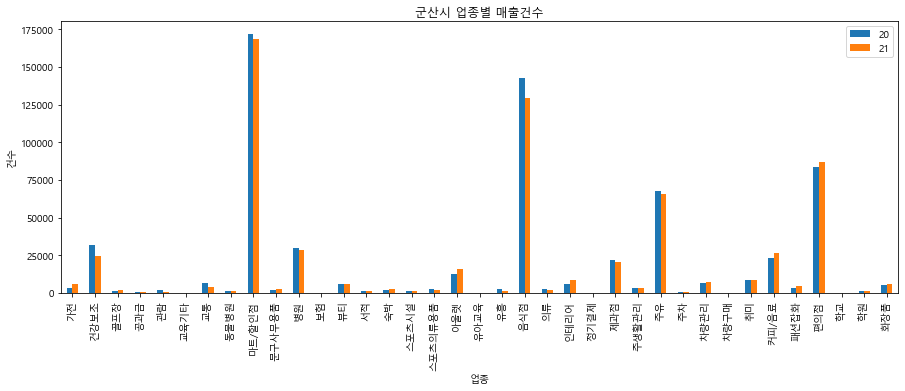

In [17]:
plt.figure()
gunsan_shop.plot(kind = 'bar',
               figsize = (15,5))
plt.title('군산시 업종별 매출건수')
plt.xlabel('업종')
plt.ylabel('건수')
plt.legend(loc = 'best')

plt.show()
plt.close()

#### 서브플롯으로 그래프 한 번에 보기
- 위 프레임과 달리 Shop을 인덱스로 사용하지 않고 Shop, cnt, Year를 칼럼으로 프레임을 만듦

In [19]:
mokpo_subplot = mokpo_shop.reset_index()
mokpo_0 = mokpo_subplot[['Shop','20']]
mokpo_0.rename(columns = {'20':'cnt'}, inplace=True)
mokpo_0['Year'] = '2020'

mokpo_1 = mokpo_subplot[['Shop','21']]
mokpo_1.rename(columns = {'21':'cnt'}, inplace=True)
mokpo_1['Year'] = '2021'

mokpo_subplot = pd.concat([mokpo_0, mokpo_1], axis = 0)
mokpo_subplot

,Shop,cnt,Year
0,가례,35.0,2020
1,가전,3394.0,2020
2,건강보조,33635.0,2020
3,골프장,792.0,2020
4,공과금,131.0,2020
...,...,...,...
33,커피/음료,29236.0,2021
34,패션잡화,1990.0,2021
35,편의점,75355.0,2021
36,학원,2354.0,2021


In [20]:
tongyeong_subplot = tongyeong_shop.reset_index()
tongyeong_0 = tongyeong_subplot[['Shop','20']]
tongyeong_0.rename(columns = {'20':'cnt'}, inplace=True)
tongyeong_0['Year'] = '2020'

tongyeong_1 = tongyeong_subplot[['Shop','21']]
tongyeong_1.rename(columns = {'21':'cnt'}, inplace=True)
tongyeong_1['Year'] = '2021'

tongyeong_subplot = pd.concat([tongyeong_0, tongyeong_1], axis = 0)
tongyeong_subplot

,Shop,cnt,Year
0,가례,62,2020
1,가전,1566,2020
2,건강보조,15066,2020
3,골프장,377,2020
4,공과금,23,2020
...,...,...,...
29,커피/음료,14105,2021
30,패션잡화,7514,2021
31,편의점,58253,2021
32,학원,958,2021


In [21]:
gunsan_subplot = gunsan_shop.reset_index()
gunsan_0 = gunsan_subplot[['Shop','20']]
gunsan_0.rename(columns = {'20':'cnt'}, inplace=True)
gunsan_0['Year'] = '2020'

gunsan_1 = gunsan_subplot[['Shop','21']]
gunsan_1.rename(columns = {'21':'cnt'}, inplace=True)
gunsan_1['Year'] = '2021'

gunsan_subplot = pd.concat([gunsan_0, gunsan_1], axis = 0)
gunsan_subplot

,Shop,cnt,Year
0,가전,3602,2020
1,건강보조,31787,2020
2,골프장,1674,2020
3,공과금,938,2020
4,관람,1710,2020
...,...,...,...
32,패션잡화,4847,2021
33,편의점,87263,2021
34,학교,61,2021
35,학원,1120,2021


- seaborn을 이용한 서브플롯

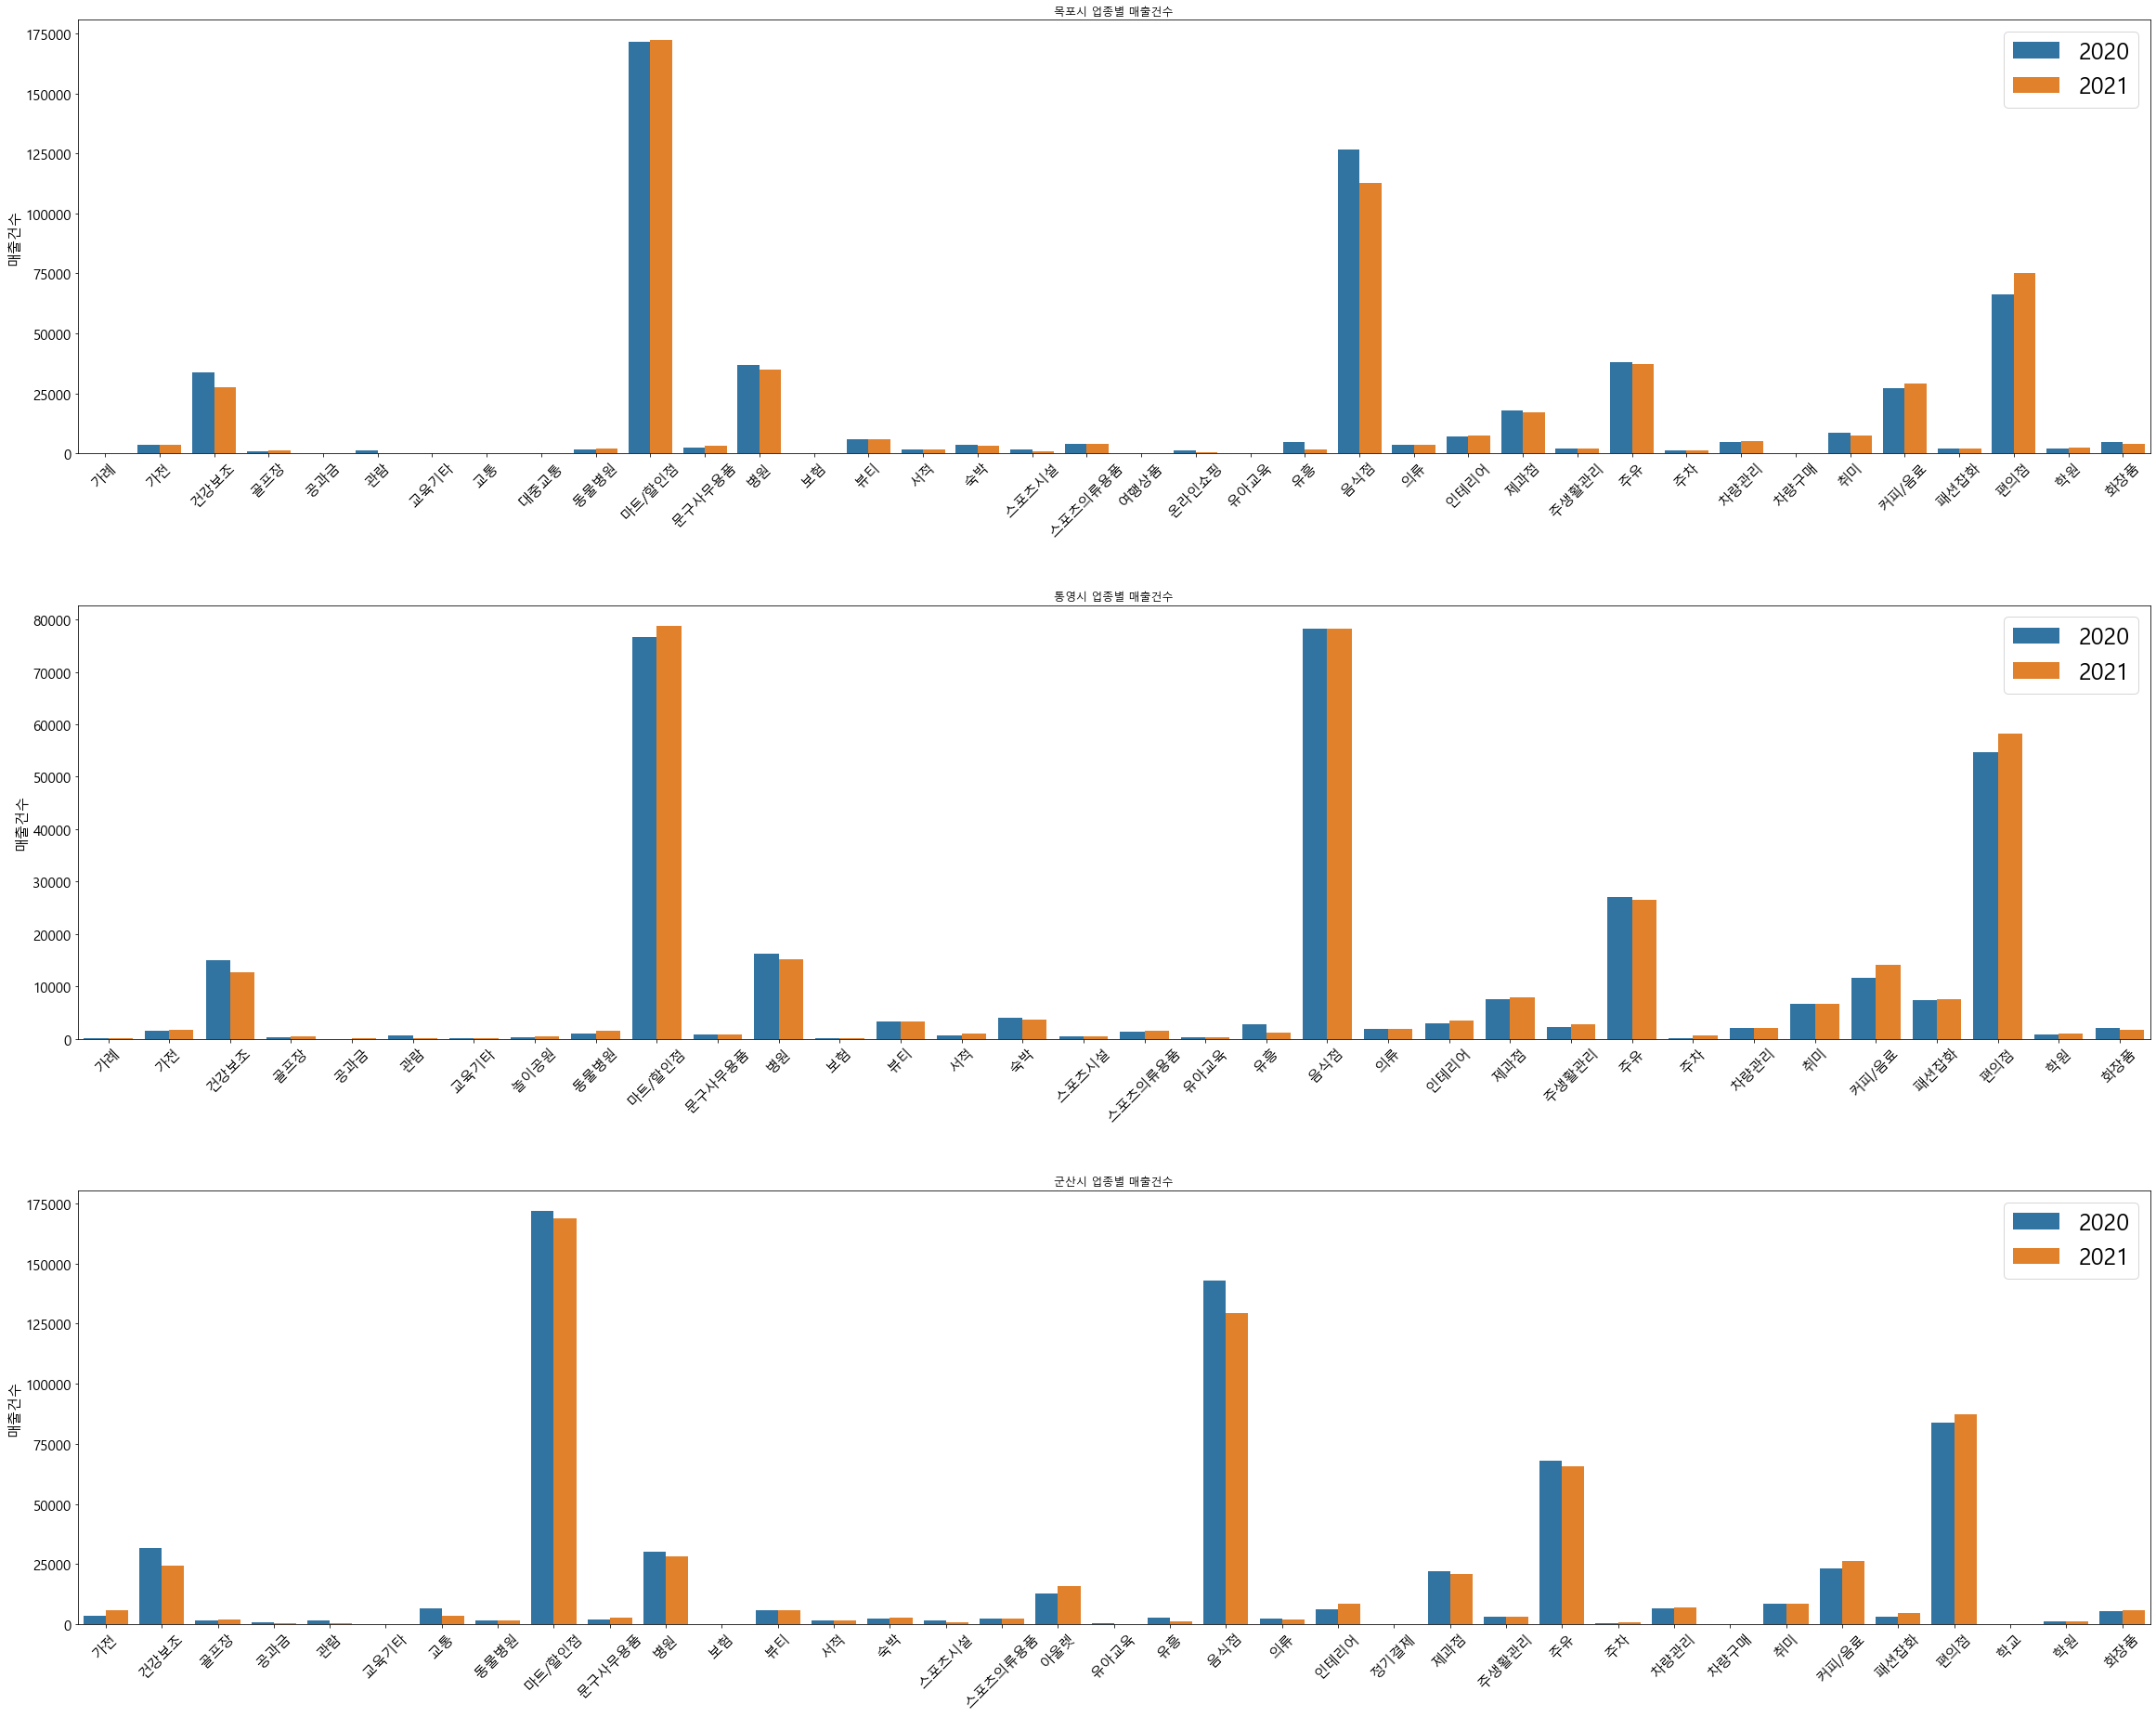

In [97]:
import seaborn as sns

fig = plt.figure(figsize = (40,30))
area01 = fig.add_subplot(3,1,1)
area01.set_title('목포시 업종별 매출건수')
sns.barplot(ax = area01, data = mokpo_subplot, x= 'Shop',y='cnt', hue = 'Year')
plt.xlabel('')
plt.ylabel('매출건수' , size = 15)
plt.xticks(rotation = 45 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 25)

area02 = fig.add_subplot(3,1,2)
area02.set_title('통영시 업종별 매출건수')
sns.barplot(ax = area02, data = tongyeong_subplot, x= 'Shop',y='cnt', hue ='Year')
plt.xlabel('')
plt.ylabel('매출건수' , size = 15)
plt.xticks(rotation = 45 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 25)

area03 = fig.add_subplot(3,1,3)
area03.set_title('군산시 업종별 매출건수')
sns.barplot(ax = area03, data = gunsan_subplot, x= 'Shop',y='cnt', hue ='Year')
plt.xticks(rotation = 45 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('')
plt.ylabel('매출건수' , size = 15)
plt.legend(fontsize = 25)

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.show()
plt.close()
plt.savefig('subplot.png')


#### 업종별 증감율 시각화
- NaN값을 0으로 대체
- 증감율: (21년 데이터 - 20년 데이터) * 100 / 20년 데이터, 소수점 2째 자리까지 출력

In [85]:
mokpo_shop.fillna(0, inplace=True)

In [112]:
mokpo_shop['증감율(%)'] = np.round(((mokpo_shop['21'] - mokpo_shop['20'])/mokpo_shop['20'])*100,2)
mokpo_shop

,20,21,증감율(%)
Shop,,,
가례,35,83.0,137.14
가전,3394,3465.0,2.09
건강보조,33635,27559.0,-18.06
골프장,792,1245.0,57.20
공과금,131,75.0,-42.75
...,...,...,...
커피/음료,27299,29236.0,7.10
패션잡화,2128,1990.0,-6.48
편의점,66161,75355.0,13.90


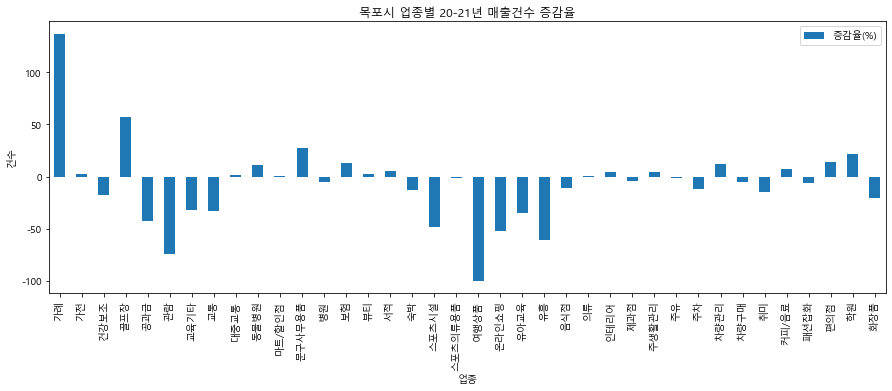

In [68]:
plt.figure()
mokpo_shop['증감율(%)'].plot(kind = 'bar',
                             figsize = (15,5))
plt.title('목포시 업종별 20-21년 매출건수 증감율')
plt.xlabel('업종')
plt.ylabel('건수')
plt.legend(loc = 'best')
plt.color='red'

plt.show()
plt.close()

- 증감율이 0보다 크거나 같은 데이터를 '증가'열에 추가
- 증감율이 0보다 작은 데이터를 '감소'열에 추가

In [113]:
mokpo_shop['증가'] = mokpo_shop['증감율(%)'][mokpo_shop['증감율(%)'] >= 0]
mokpo_shop['감소'] = mokpo_shop['증감율(%)'][mokpo_shop['증감율(%)'] < 0]

In [114]:
mokpo_shop

,20,21,증감율(%),증가,감소
Shop,,,,,
가례,35,83.0,137.14,137.14,NaN
가전,3394,3465.0,2.09,2.09,NaN
건강보조,33635,27559.0,-18.06,NaN,-18.06
골프장,792,1245.0,57.20,57.20,NaN
공과금,131,75.0,-42.75,NaN,-42.75
...,...,...,...,...,...
커피/음료,27299,29236.0,7.10,7.10,NaN
패션잡화,2128,1990.0,-6.48,NaN,-6.48
편의점,66161,75355.0,13.90,13.90,NaN


<Figure size 432x288 with 0 Axes>

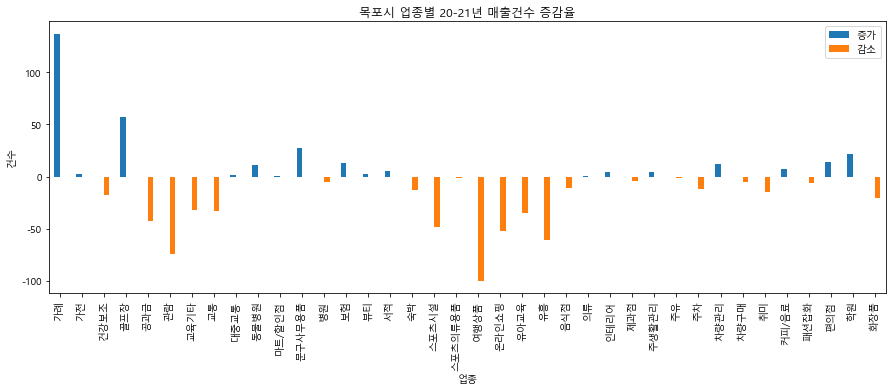

In [73]:
plt.figure()
mokpo_shop[['증가','감소']].plot(kind = 'bar',
                             figsize = (15,5))
plt.title('목포시 업종별 20-21년 매출건수 증감율')
plt.xlabel('업종')
plt.ylabel('건수')
plt.legend(loc = 'best')
plt.color='red'

plt.show()
plt.close()

In [115]:
tongyeong_shop.fillna(0, inplace=True)
tongyeong_shop['증감율(%)'] = np.round(((tongyeong_shop['21'] - tongyeong_shop['20'])/tongyeong_shop['20'])*100,2)
tongyeong_shop['증가'] = tongyeong_shop['증감율(%)'][tongyeong_shop['증감율(%)'] >= 0]
tongyeong_shop['감소'] = tongyeong_shop['증감율(%)'][tongyeong_shop['증감율(%)'] < 0]
tongyeong_shop

,20,21,증감율(%),증가,감소
Shop,,,,,
가례,62,47,-24.19,NaN,-24.19
가전,1566,1762,12.52,12.52,NaN
건강보조,15066,12780,-15.17,NaN,-15.17
골프장,377,464,23.08,23.08,NaN
공과금,23,59,156.52,156.52,NaN
...,...,...,...,...,...
커피/음료,11636,14105,21.22,21.22,NaN
패션잡화,7472,7514,0.56,0.56,NaN
편의점,54724,58253,6.45,6.45,NaN


<Figure size 432x288 with 0 Axes>

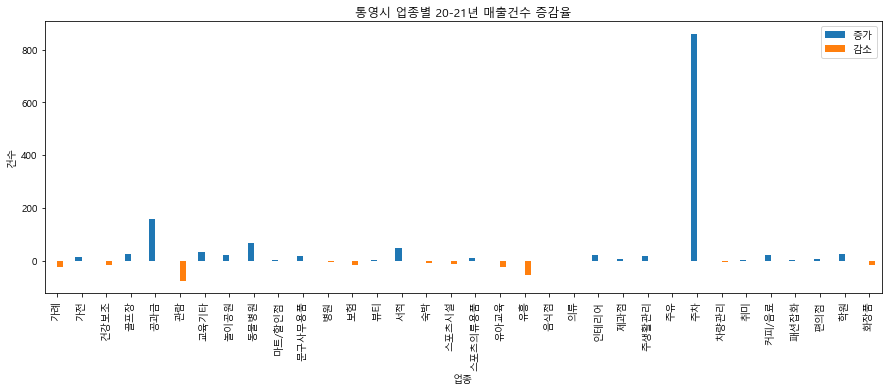

In [80]:
plt.figure()
tongyeong_shop[['증가','감소']].plot(kind = 'bar',
                                     figsize = (15,5))
plt.title('통영시 업종별 20-21년 매출건수 증감율')
plt.xlabel('업종')
plt.ylabel('건수')
plt.legend(loc = 'best')
plt.color='red'

plt.show()
plt.close()

In [82]:
new_tongyeong_shop = tongyeong_shop.drop('주차',axis=0)

<Figure size 432x288 with 0 Axes>

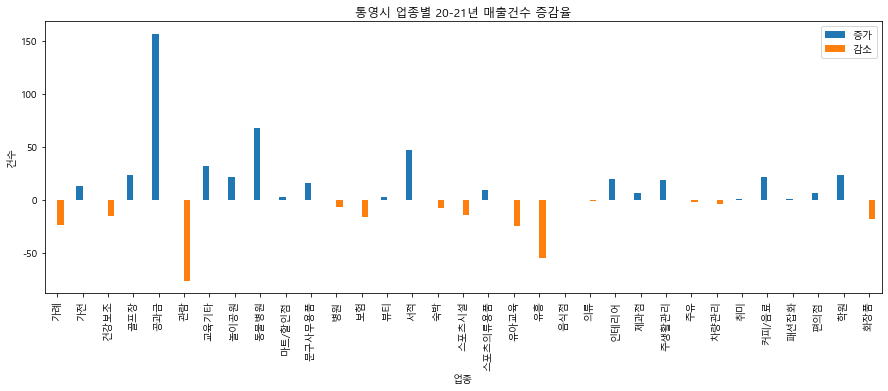

In [83]:
plt.figure()
new_tongyeong_shop[['증가','감소']].plot(kind = 'bar',
                                     figsize = (15,5))
plt.title('통영시 업종별 20-21년 매출건수 증감율')
plt.xlabel('업종')
plt.ylabel('건수')
plt.legend(loc = 'best')
plt.color='red'

plt.show()
plt.close()

In [116]:
gunsan_shop.fillna(0, inplace=True)
gunsan_shop['증감율(%)'] = np.round(((gunsan_shop['21'] - gunsan_shop['20'])/gunsan_shop['20'])*100,2)
gunsan_shop['증가'] = gunsan_shop['증감율(%)'][gunsan_shop['증감율(%)'] >= 0]
gunsan_shop['감소'] = gunsan_shop['증감율(%)'][gunsan_shop['증감율(%)'] < 0]
gunsan_shop

,20,21,증감율(%),증가,감소
Shop,,,,,
가전,3602,6029,67.38,67.38,NaN
건강보조,31787,24534,-22.82,NaN,-22.82
골프장,1674,2006,19.83,19.83,NaN
공과금,938,531,-43.39,NaN,-43.39
관람,1710,434,-74.62,NaN,-74.62
...,...,...,...,...,...
패션잡화,3065,4847,58.14,58.14,NaN
편의점,83898,87263,4.01,4.01,NaN
학교,62,61,-1.61,NaN,-1.61


<Figure size 432x288 with 0 Axes>

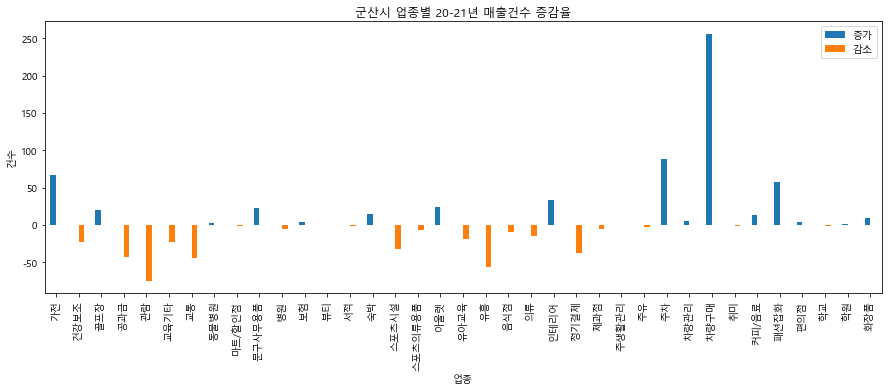

In [79]:
plt.figure()
gunsan_shop[['증가','감소']].plot(kind = 'bar',
                                  figsize = (15,5))
plt.title('군산시 업종별 20-21년 매출건수 증감율')
plt.xlabel('업종')
plt.ylabel('건수')
plt.legend(loc = 'best')
plt.color='red'

plt.show()
plt.close()